In [1]:
library(modelr)
library(dplyr)
library(ggplot2)

Warning message:
"package 'modelr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [8]:
heights

income,height,weight,age,marital,sex,education,afqt
19000,60,155,53,married,female,13,6.841
35000,70,156,51,married,female,10,49.444
105000,65,195,52,married,male,16,99.393
40000,63,197,54,married,female,14,44.022
75000,66,190,49,married,male,14,59.683
102000,68,200,49,divorced,female,18,98.798
0,74,225,48,married,male,16,82.260
70000,64,160,54,divorced,female,12,50.283
60000,69,162,55,divorced,male,12,89.669
150000,69,194,54,divorced,male,13,95.977


In [37]:
cleaned_heights <- na.omit(heights)

m1 <- lm(income ~ height, data=cleaned_heights)
m2 <- lm(income ~ height*weight, data=cleaned_heights)
m3 <- lm(income ~ height + weight + age + marital + sex + education + afqt, data=cleaned_heights)

[1] "Model 1, income ~ height"

[1] "RMSE:"

[1] 3.683803e+14

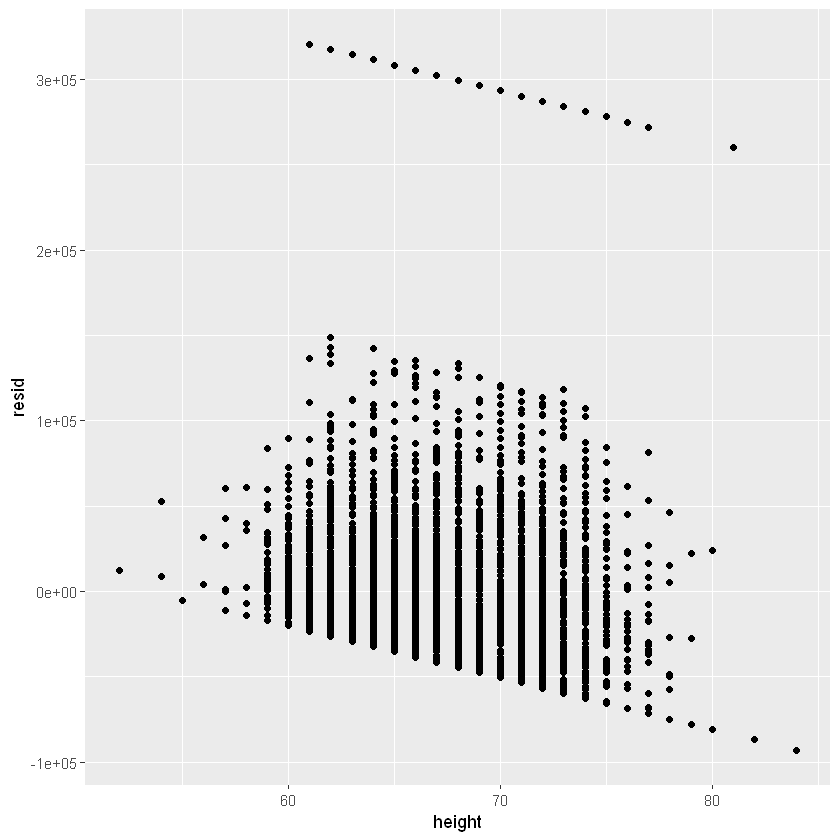

In [73]:
cleaned_heights <- cleaned_heights %>% gather_residuals(m1)
'Model 1, income ~ height'
'RMSE:'
sum(cleaned_heights['resid']^2)
ggplot(cleaned_heights, aes(x=height, y=resid)) + geom_point()

[1] "Model 2, income ~ height*weight"

[1] "RMSE"

[1] 3.670913e+14

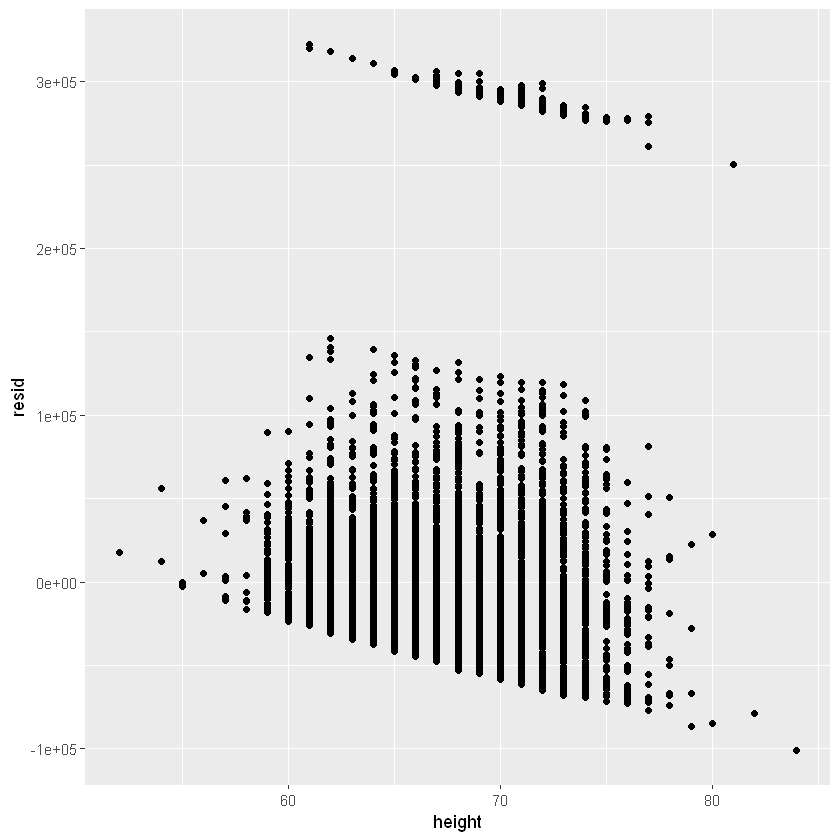

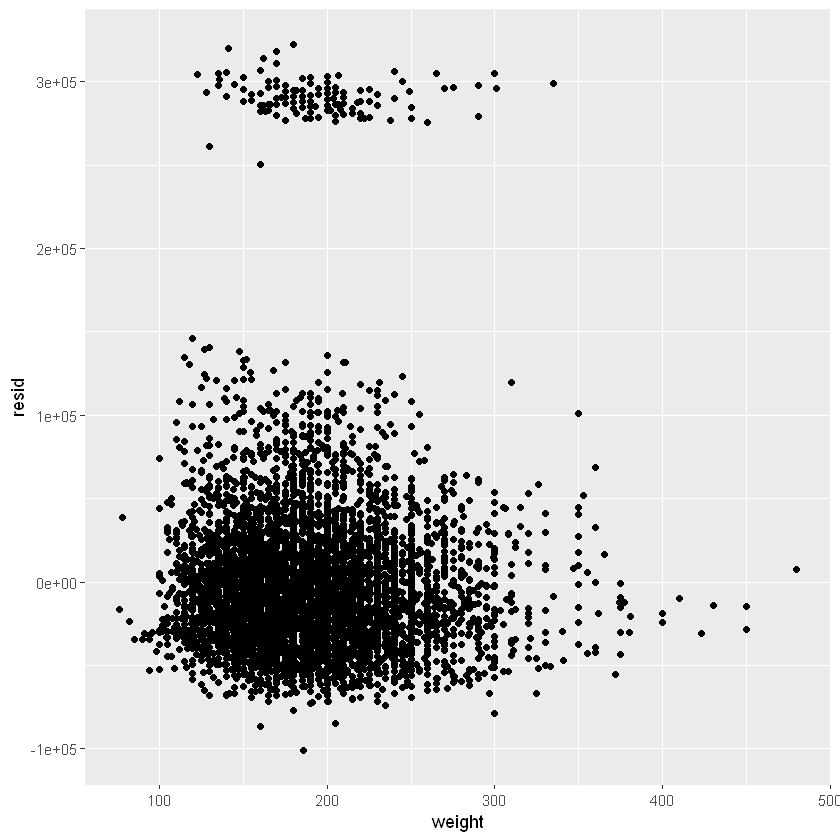

In [74]:
cleaned_heights <- cleaned_heights %>% gather_residuals(m2)
'Model 2, income ~ height*weight'
'RMSE'
sum(cleaned_heights['resid']^2)
ggplot(cleaned_heights, aes(x=height, y=resid)) + geom_point()
ggplot(cleaned_heights, aes(x=weight, y=resid)) + geom_point()

[1] "Model 3, income ~ height + weight + age + marital + sex + education + afqt"

[1] "RMSE"

[1] 3.116437e+14

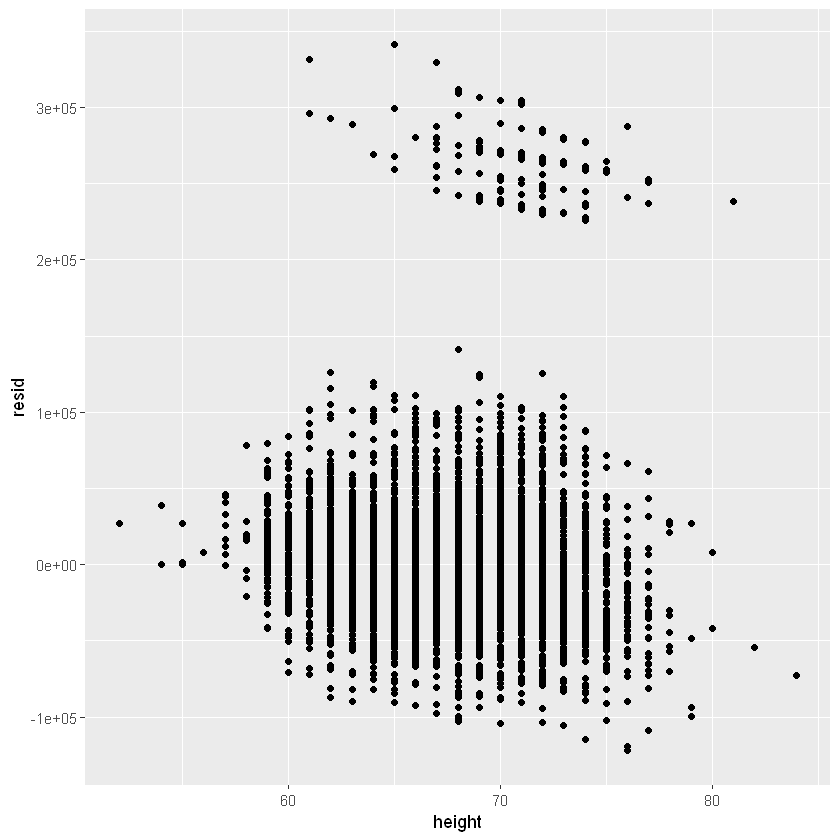

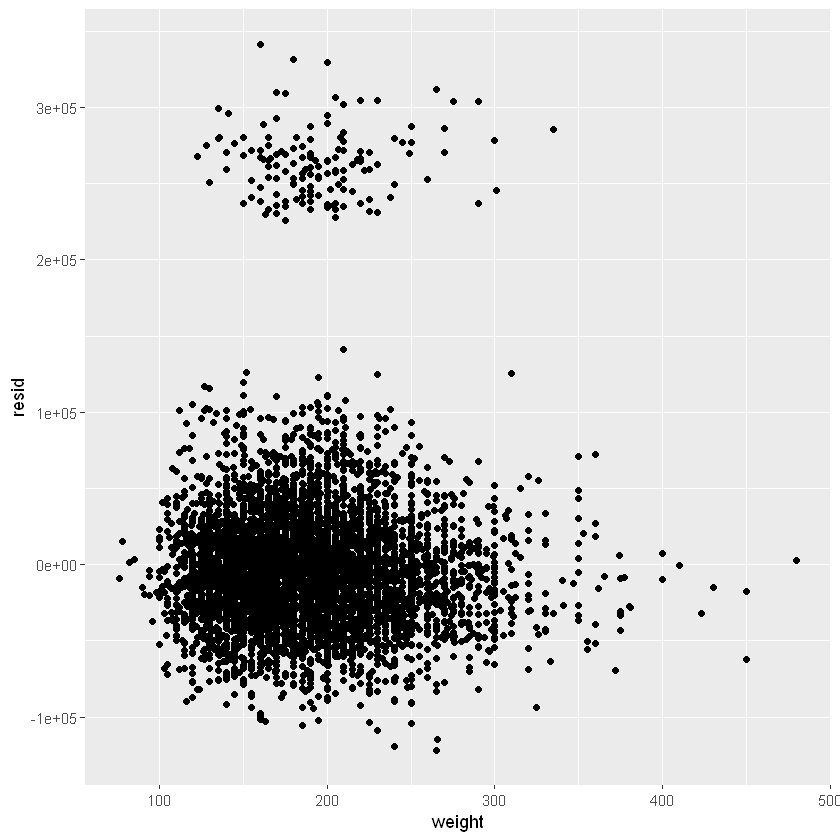

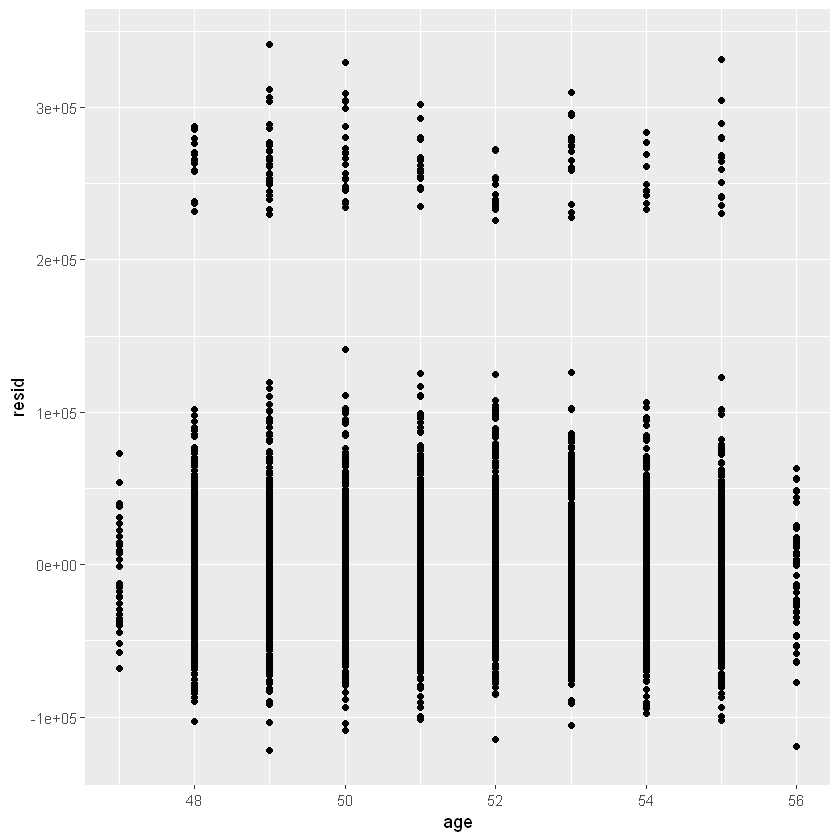

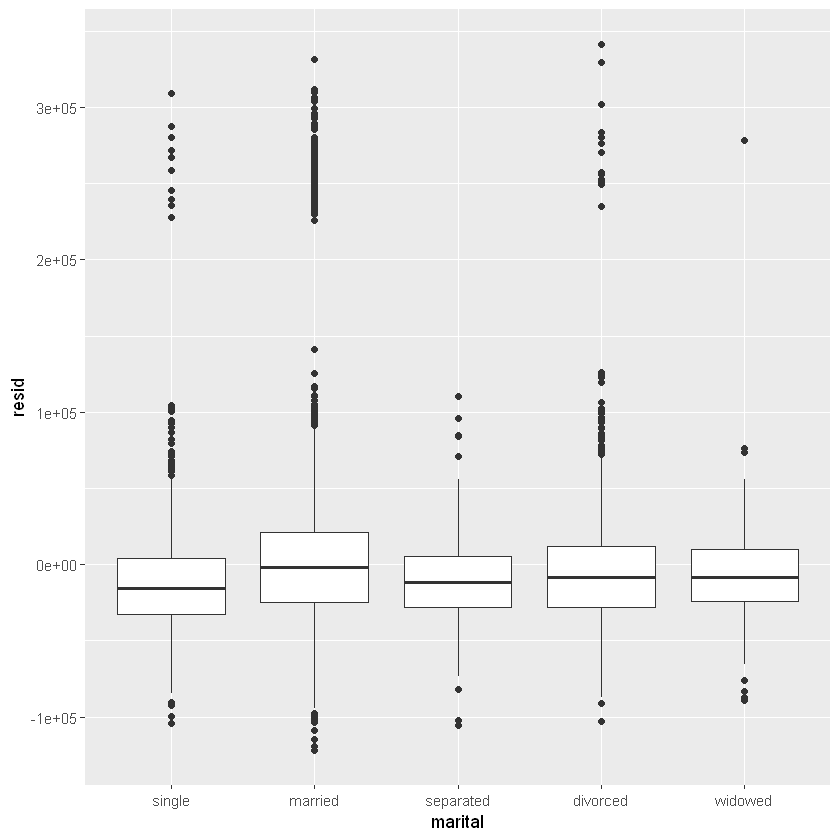

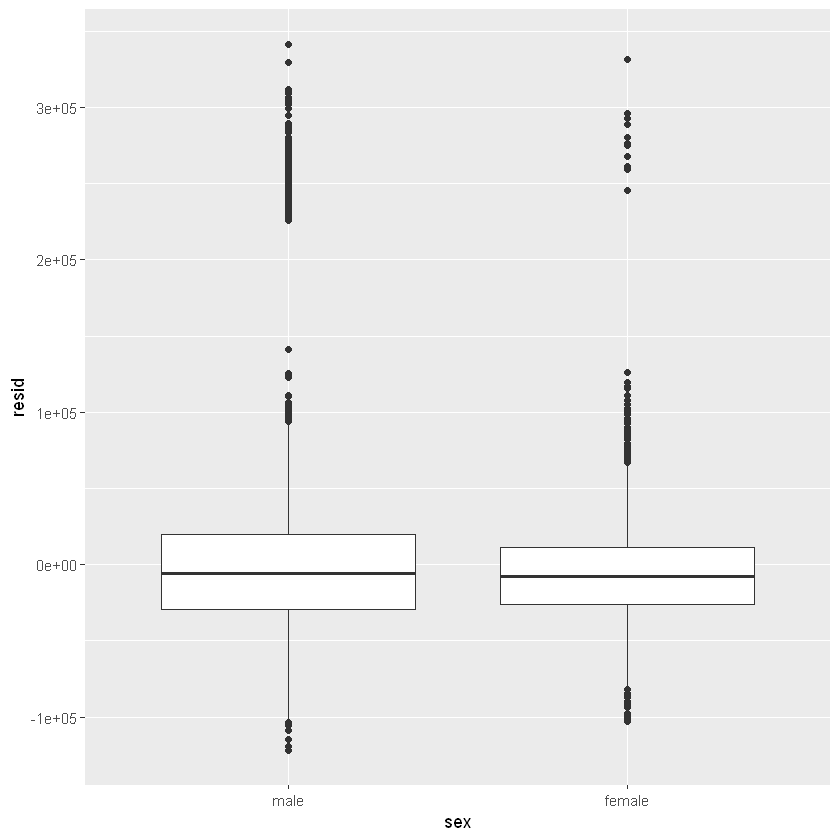

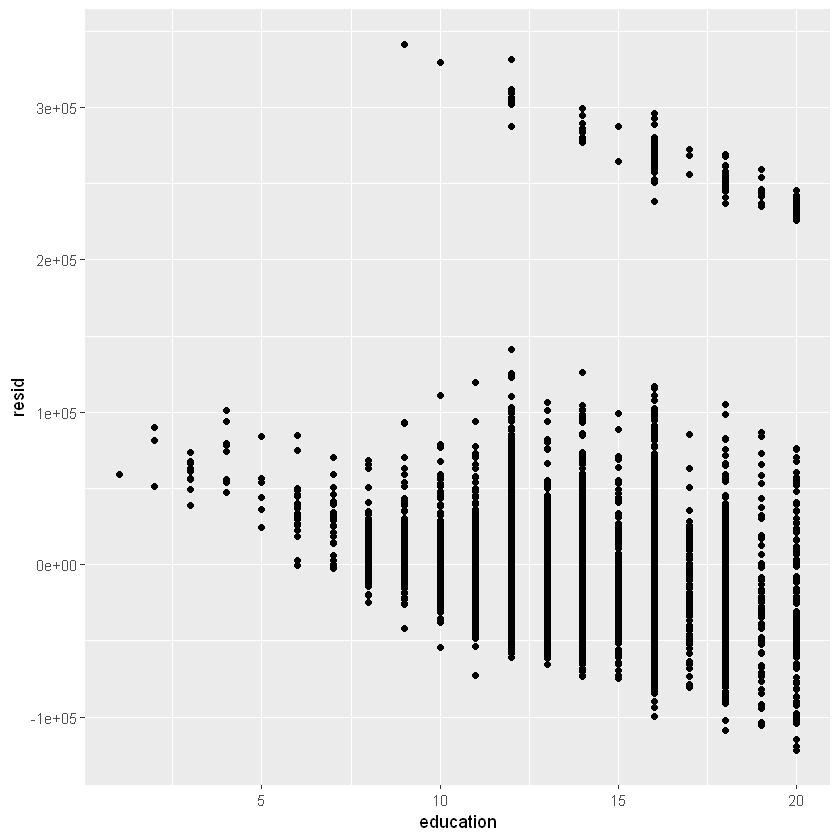

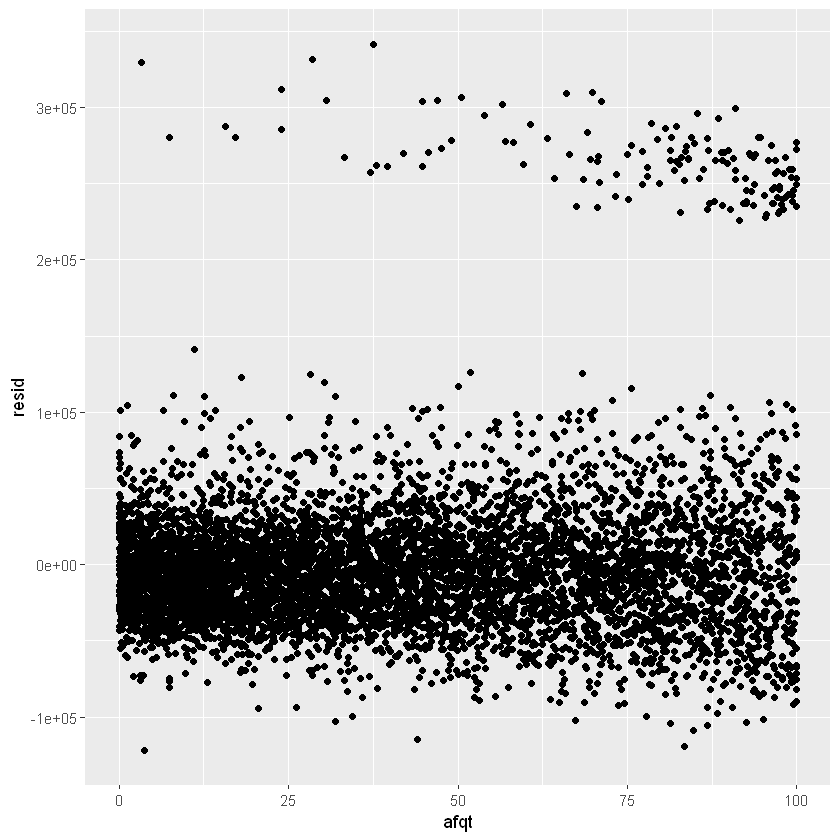

In [75]:
cleaned_heights <- cleaned_heights %>% gather_residuals(m3)
'Model 3, income ~ height + weight + age + marital + sex + education + afqt'
'RMSE'
sum(cleaned_heights['resid']^2)
ggplot(cleaned_heights, aes(x=height, y=resid)) + geom_point()
ggplot(cleaned_heights, aes(x=weight, y=resid)) + geom_point()
ggplot(cleaned_heights, aes(x=age, y=resid)) + geom_point()
ggplot(cleaned_heights, aes(x=marital, y=resid)) + geom_boxplot()
ggplot(cleaned_heights, aes(x=sex, y=resid)) + geom_boxplot()
ggplot(cleaned_heights, aes(x=education, y=resid)) + geom_point()
ggplot(cleaned_heights, aes(x=afqt, y=resid)) + geom_point()